In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 237MB/s]
100% 1.06G/1.06G [00:04<00:00, 244MB/s]


In [3]:
#unzip files
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [5]:
conv_base=VGG16(weights="imagenet",
                include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image

In [10]:
batch_size=32
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(directory="/content/train",
                                                   target_size=(150,150),
                                                   batch_size=batch_size,
                                                   class_mode="binary")
validation_generator=test_datagen.flow_from_directory(directory="/content/test",
                                                   target_size=(150,150),
                                                   batch_size=batch_size,
                                                   class_mode="binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
# # Normalize
# def process(image,label):
#   image=tensorflow.cast(image/255.0,tensorflow.float32)
#   return image,label
# train_ds=train_ds.map(process)
# validation_ds=validation_ds.map(process)

In [13]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10
625/625 [==============================] - 318s 507ms/step - loss: 0.2732 - accuracy: 0.8824 - val_loss: 0.1748 - val_accuracy: 0.9262
Epoch 2/10
625/625 [==============================] - 313s 501ms/step - loss: 0.1712 - accuracy: 0.9290 - val_loss: 0.1520 - val_accuracy: 0.9380
Epoch 3/10
625/625 [==============================] - 307s 491ms/step - loss: 0.1414 - accuracy: 0.9425 - val_loss: 0.1306 - val_accuracy: 0.9478
Epoch 4/10
625/625 [==============================] - 308s 493ms/step - loss: 0.1242 - accuracy: 0.9502 - val_loss: 0.1214 - val_accuracy: 0.9530
Epoch 5/10
625/625 [==============================] - 309s 495ms/step - loss: 0.1098 - accuracy: 0.9565 - val_loss: 0.1468 - val_accuracy: 0.9420
Epoch 6/10
625/625 [==============================] - 306s 490ms/step - loss: 0.0960 - accuracy: 0.9599 - val_loss: 0.1193 - val_accuracy: 0.9512
Epoch 7/10
625/625 [==============================] - 311s 497ms/step - loss: 0.0832 - accuracy: 0.9689 - val_loss: 0.1249 -

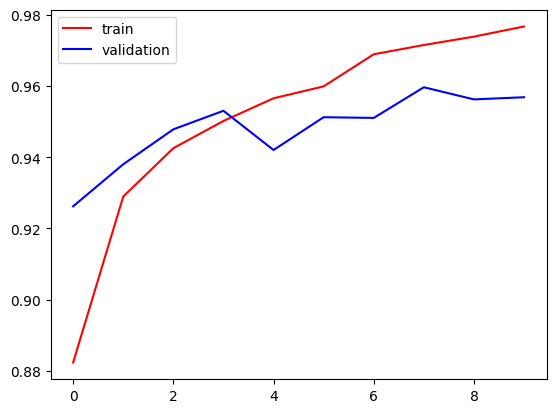

In [14]:
# plot history graph
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="validation")
plt.legend()
plt.show()

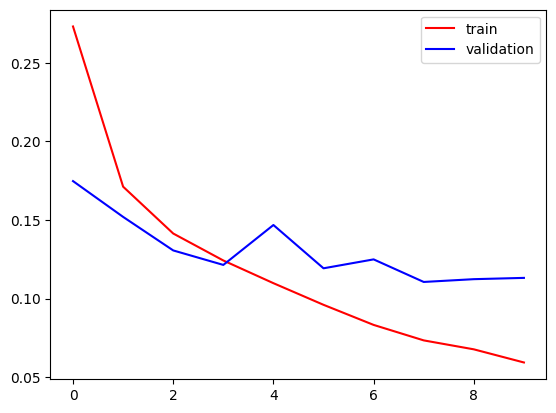

In [15]:
# plot loss
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="validation")
plt.legend()
plt.show()